In [10]:
# load data from test and train csv files

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [11]:
# Load data
def load_data():
    train = pd.read_csv('../playground-series-s4e5/train.csv')
    test = pd.read_csv('../playground-series-s4e5/test.csv')
    return train, test
    
train, test = load_data()
# call the id column from the test data
ids = test['id']

In [12]:
# Preprocess data

def preprocess_data(train, test):
    # Drop columns
    train = train.drop(['id'], axis=1)
    test = test.drop(['id'], axis=1)
    # Split data
    X = train.drop(['FloodProbability'], axis=1)
    y = train['FloodProbability']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_valid, y_train, y_valid, test

In [13]:
#standardize the data using the StandardScaler
from sklearn.preprocessing import StandardScaler

def standardize_data(X_train, X_valid, test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    test = scaler.transform(test)
    return X_train, X_valid, test

In [14]:
X_train, X_valid, y_train, y_valid, test = preprocess_data(train, test)
X_train, X_valid, test = standardize_data(X_train, X_valid, test)

In [15]:
# Define the hyperparameters to search
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
}

model = LinearRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'copy_X': True, 'fit_intercept': True}
Best score:  0.8449590751316354


In [16]:
# Train the model with the best parameters
model = LinearRegression(**grid_search.best_params_)
model.fit(X_train, y_train)
# Make predictions
predictions = model.predict(X_valid)
print(r2_score(y_valid, predictions)) # print the r2 score

0.8448773362840338


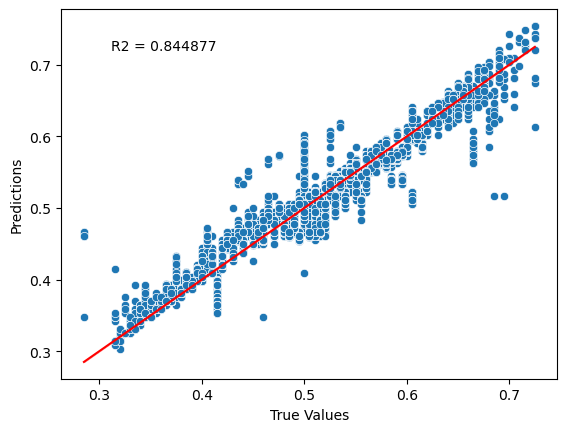

In [17]:
#plot the predictions
sns.scatterplot(x=y_valid, y=predictions)
#draw regression line
sns.lineplot(x=y_valid, y=y_valid, color='red')
#show R2 score inside the plot
plt.text(0.1, 0.9, 'R2 = %f' % r2_score(y_valid, predictions), ha='left', va='center', transform=plt.gca().transAxes)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


In [19]:
## predict on the test data
predictions = model.predict(test)

# Combine ids and predictions into a structured array
combined_data = np.array(list(zip(ids, predictions)), dtype=[('id', int), ('FloodProbability', float)])

# Define the header
header = 'id,FloodProbability'

# Save to CSV with header
np.savetxt('submission.csv', combined_data, delimiter=',', header=header, fmt='%d,%.2f', comments='')